In [1]:
### importing QComp ###
include("../src/QComp.jl")
using .QComp

using Yao
using YaoPlots
using LinearAlgebra
using PyPlot
using Random

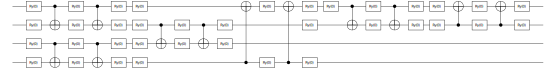

In [4]:
circ = build_QCNN(4,ansatz=conv_Ry2)
YaoPlots.plot(circ)

In [5]:
#Example use (random states vs uniform state)

seed = 2
Random.seed!(seed)

n = 4 # preferably a power of 2

states1 = [rand_state(n) for i=1:10]
states2 = [uniform_state(n) for i=1:10]
states = vcat([states1, states2]...)
labels = vcat([repeat([1],10), repeat([-1],10)]...)

test_states1 = [rand_state(n) for i=1:10]
test_states2 = [uniform_state(n) for i=1:10]
test_states = vcat([test_states1, test_states2]...)
test_labels = vcat([repeat([1],10), repeat([-1],10)]...)

d1 = Data(states, labels);
d2 = Data(test_states, test_labels);

In [22]:
iters = 300
# Using ADAM optimiser in source code.
# See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.
lr = 0.05  # Start with lr=0.1. Reduce to lr=0.01 if optimisation is not smooth.
sig = true
ansatz=conv_SU4


circ = build_QCNN(n,ansatz=ansatz)
#p = GenericParams(n=n, circ=circ)
p = InvariantParams(n=n, circ=circ,ansatz=ansatz)
initialize_params(p);

In [23]:
params, loss_track, tr_track, te_track, tr_preds, te_preds = train_test_model(d1, d2, p, iters, sig, lr; output=false)

Initial: loss = 1.2534632691964565,tr_acc = 0.55, te_acc = 0.7
Final: loss = 0.0014566559315043065,tr_acc = 1.0, te_acc = 0.85


([4.011601628649838, 0.9874965115774915, 1.7518583267311116, 6.0341397112600195, 5.251541198055754, 3.751978455483962, 2.594824969784011, 2.85190892078792, 5.255149829750944, 5.264711222414942  …  3.955887802176275, 1.5147522646589398, 2.5401372366545836, 2.5549643776109985, 2.211071469659044, 3.991685323930054, 2.7943569730579965, 2.396371294856456, 0.8865428205124632, 5.278335254691393], [1.2534632691964565, 0.8832384815561176, 0.5819702710561757, 0.3724710398248077, 0.2112359494291865, 0.11481574081245649, 0.11512060219867187, 0.14883003665952926, 0.1146703731602405, 0.08630301629038675  …  0.0015430016147329382, 0.0015332368902238572, 0.0015235127230785453, 0.0015138299692046132, 0.0015041895252803613, 0.001494592326752243, 0.0014850393457264744, 0.001475531588757723, 0.0014660700945401273, 0.0014566559315043065], [0.55, 0.6, 0.75, 0.85, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.7, 0.75, 0.75, 0.8, 0.8, 0.75, 0.75, 0.8, 0.8, 0.75  …  0.

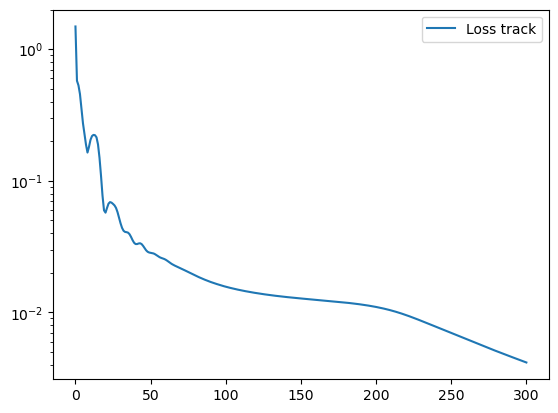

In [13]:
PyPlot.semilogy(0:iters, loss_track, label="Loss track")
PyPlot.legend()
PyPlot.display_figs()

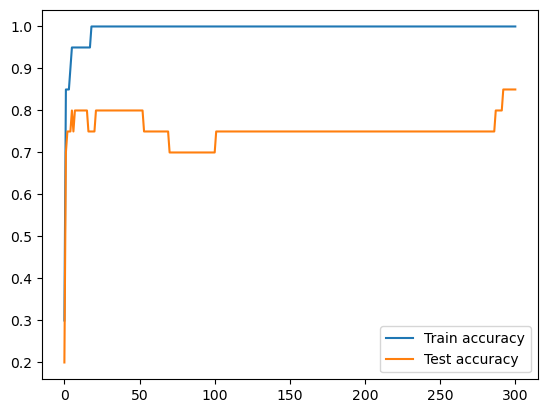

In [14]:
PyPlot.plot(0:iters, tr_track, label="Train accuracy")
PyPlot.plot(0:iters, te_track, label="Test accuracy")
PyPlot.legend()
PyPlot.display_figs()

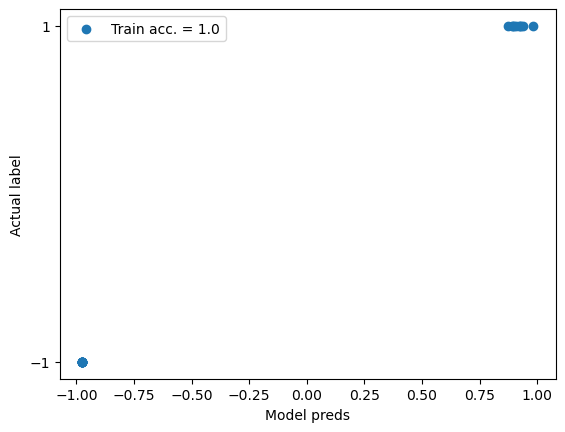

In [15]:
PyPlot.scatter(tr_preds, labels, label="Train acc. = $(round(tr_track[end],digits=2))")
#PyPlot.scatter(te_preds, test_labels, label="Test acc. = $(round(te_track[end],digits=2))")
PyPlot.xlabel("Model preds")
PyPlot.ylabel("Actual label")
PyPlot.yticks(-1:2:1)
PyPlot.legend()
PyPlot.display_figs()